In [1]:
import numpy as np

def sorted_frames(dataset):
    yield from map(
        lambda e: e[1],
        sorted((int(key), np.array(img())) for key, img in catalog.load(dataset).items())
    )

In [2]:
gt_frames = list(sorted_frames("ffmpeg_frames_virat_tiny"))
roi_y = slice(800,1050)
roi_x = slice(1500,1800)

2022-01-08 13:42:52,764 - kedro.io.data_catalog - INFO - Loading data from `ffmpeg_frames_virat_tiny` (PartitionedDataSet)...


In [3]:
from matplotlib import pyplot as plt

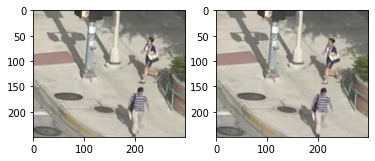

In [4]:
_, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(gt_frames[0][roi_y, roi_x])
ax2.imshow(gt_frames[1][roi_y, roi_x])

2022-01-08 13:42:55,713 - kedro.io.data_catalog - INFO - Loading data from `frames_virat_tiny` (PartitionedDataSet)...


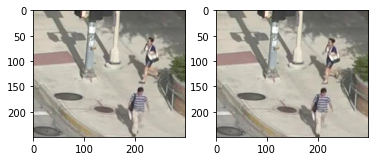

In [5]:
import numpy as np
generated = [np.array(img()) for _, img in sorted(catalog.load("frames_virat_tiny").items())]
_, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(generated[0][roi_y, roi_x])
ax2.imshow(generated[1][roi_y, roi_x])

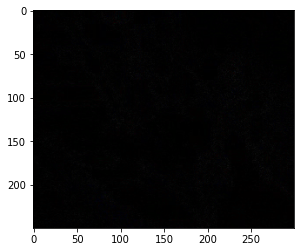

In [6]:
!pip install opencv-python
import cv2

diff_img = cv2.absdiff(generated[0][roi_y, roi_x], gt_frames[0][roi_y, roi_x])
plt.imshow(diff_img)

1.9539111111111112 0 20


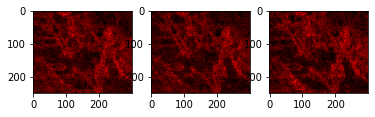

In [7]:
dmean, dmin, dmax = np.mean(diff_img), np.min(diff_img), np.max(diff_img) 
print(dmean, dmin, dmax)

_, axs = plt.subplots(1, diff_img.shape[2])
for i, ax in enumerate(axs):
    ax.imshow(diff_img[:,:,i], cmap='hot')

Text(0.5, 0, 'Generated frame num')

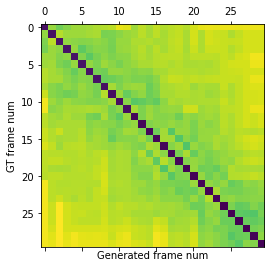

In [8]:
import itertools

diff_mat = np.zeros((len(gt_frames), len(generated)))
for a, b in itertools.product(enumerate(gt_frames), enumerate(generated)):
    diff_img = cv2.absdiff(a[1], b[1])
    dmean, dmin, dmax = np.mean(diff_img), np.min(diff_img), np.max(diff_img) 
    diff_mat[a[0], b[0]] = dmax
    
plt.matshow(diff_mat)
plt.ylabel("GT frame num")
plt.xlabel("Generated frame num")